# Fitting a Treasury Yield Curve

This section looks at how we might fit a yield curve using Nelson-Siegel

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Calculating Flow Times

It is important to calculate the cashflow times correctly.

We distinguish between the calendar time t which is today and the payment time.

The payment time is fixed but as we move through time the calendar time increases

In [50]:
# Get the payment times for a bond with maturity in mat years at calendar time t
def flowTimes(maturity, frequency):
    small = 1e-10
    numPaymentsMinusOne = int(maturity * frequency-small)
    firstPayment = maturity - numPaymentsMinusOne / frequency
    return np.linspace(firstPayment,maturity,numPaymentsMinusOne+1)

In [51]:
flowTimes(1.0,2)

array([0.5, 1. ])

In [52]:
print(flowTimes(3.1,2))

[0.1 0.6 1.1 1.6 2.1 2.6 3.1]


In [53]:
print(flowTimes(3.0,2))

[0.5 1.  1.5 2.  2.5 3. ]


In [54]:
print(flowTimes(2.9,2))

[0.4 0.9 1.4 1.9 2.4 2.9]


In [55]:
print(flowTimes(10.0,2))

[ 0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5 10. ]


## Bond Price and Yield Calculations

In [56]:
def bondFullPriceFromYield(y,maturity,coupon,frequency):
    paymentTimes = flowTimes(maturity,frequency)    
    price = 0.0
    df = 1.0
    for t in paymentTimes:
        df = 1.0/(1.0 + y/frequency)**(t*frequency)
        price += ( coupon / frequency ) * df
        
    price += df # par 
    return price

In [57]:
def accruedInterest(maturity,coupon,frequency):
    paymentTimes = flowTimes(maturity,frequency)    
    accruedPeriod = 1.0/frequency - paymentTimes[0]
    return accruedPeriod * coupon

In [58]:
bondFullPriceFromYield(0.05,5.0,0.05,2)

1.0000000000000009

In [59]:
bondFullPriceFromYield(0.05,5.2,0.05,2)

1.0149258620941126

In [60]:
bondFullPriceFromYield(0.05,5.1,0.05,2)

1.019950493233111

In [61]:
bondFullPriceFromYield(0.06,5.0,0.06,2)

0.9999999999999998

In [62]:
bondFullPriceFromYield(0.06,10.0,0.06,4)

1.0000000000000029

## Bond Price Action

Let's study how the price of a bond evolves through time

In [63]:
def plotFullPriceAction(y, maturity, coupon, frequency):
    
    calendarTimes = np.linspace(0.0,maturity,1001)
    fullPrices = []
    cleanPrices = []

    for t in calendarTimes:
        yearsToMaturity = maturity - t
        fullPrice = bondFullPriceFromYield(y, yearsToMaturity, coupon, frequency)
        accrued = accruedInterest(yearsToMaturity, coupon, frequency)
        cleanPrice = fullPrice - accrued
        fullPrices.append(fullPrice*100)
        cleanPrices.append(cleanPrice*100)

    plt.figure(figsize=(12, 6))
    plt.plot(calendarTimes, fullPrices, 'b', label = 'Full Price')
    plt.plot(calendarTimes, cleanPrices, 'r', label = 'Clean Price')
    plt.grid(True)
    plt.xlabel('Calendar Time (years)')
    plt.ylabel('Coupon Paying Bond Price')
    plt.legend()

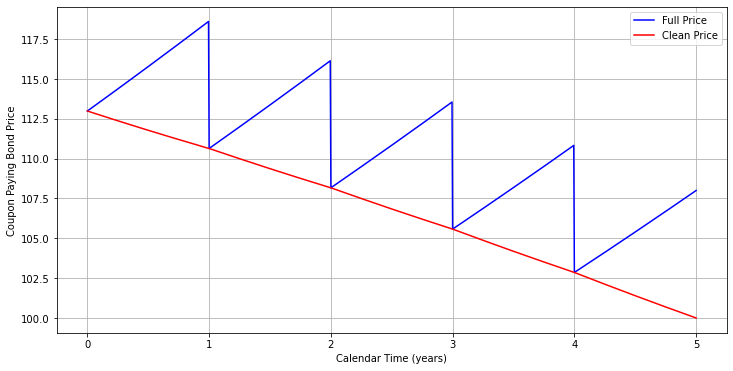

In [64]:
maturity = 5.0
coupon = 0.08
frequency = 1.0
yld = 0.05

plotFullPriceAction(yld, maturity, coupon, frequency)

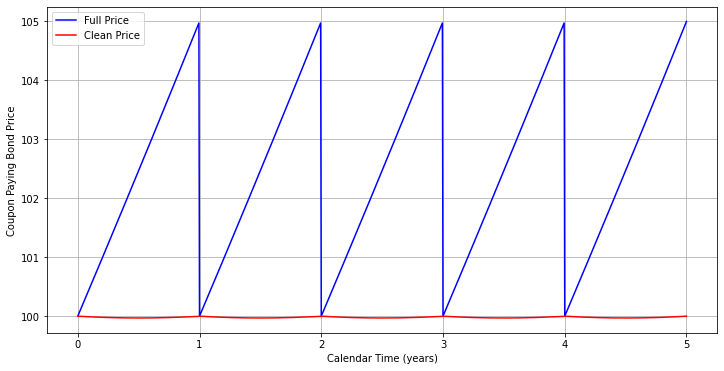

In [65]:
maturity = 5.0
coupon = 0.05
frequency = 1.0
yld = 0.05

plotFullPriceAction(yld,maturity, coupon, frequency)

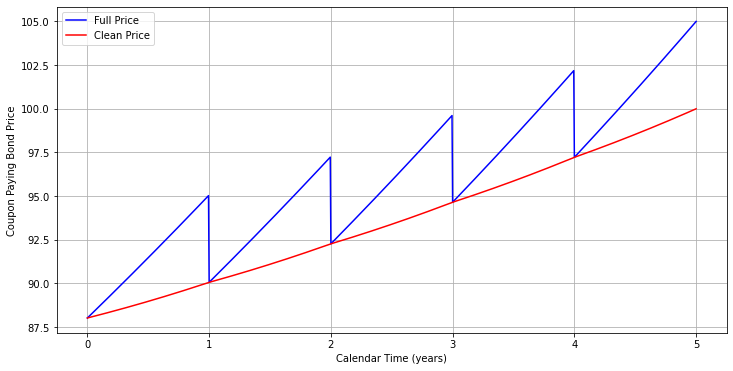

In [66]:
maturity = 5.0
coupon = 0.05
frequency = 1.0
yld = 0.08

plotFullPriceAction(yld,maturity, coupon, frequency)

## Yield Curve Building

Look at fitting some bond prices on a yield curve by loading a set of bonds

In [67]:
import pandas as pd
bondDf = pd.read_csv('./data/giltbondprices.txt',sep='\t')

In [68]:
bondDf

,epic,description,coupon,maturity,bid,ask,change,income yield,gross redemption yield
0,TR13,Uk Gilt Treasury Stk,4.50,07-Mar-13,101.92,102.07,-0.01,4.41,0.22
1,T813,Uk Gilt Treasury Stk,8.00,27-Sep-13,107.86,107.98,-0.03,7.41,0.23
2,TR14,Uk Gilt Treasury Stk,2.25,07-Mar-14,102.90,103.05,0.01,2.18,0.22
3,T514,Uk Gilt Treasury Stk,5.00,07-Sep-14,109.28,109.43,0.02,4.57,0.23
4,TR15,Uk Gilt Treasury Stk,2.75,22-Jan-15,105.57,105.68,0.05,2.60,0.33
5,T4T,Uk Gilt Treasury Stk,4.75,07-Sep-15,112.92,113.04,0.04,4.20,0.35
6,TY8,Uk Gilt Treasury Stk,8.00,07-Dec-15,124.39,124.55,0.04,6.43,0.34
7,TS16,Uk Gilt Treasury Stk,2.00,22-Jan-16,104.92,105.04,0.07,1.91,0.49
8,T16,Uk Gilt Treasury Stk,4.00,07-Sep-16,113.44,113.55,0.08,3.52,0.56
9,TR17,Uk Gilt Treasury Stk,8.75,25-Aug-17,138.48,138.66,0.14,6.31,0.77


In [69]:
bondDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   epic                    33 non-null     object 
 1   description             33 non-null     object 
 2   coupon                  33 non-null     float64
 3   maturity                33 non-null     object 
 4   bid                     33 non-null     float64
 5   ask                     33 non-null     float64
 6   change                  33 non-null     float64
 7   income yield            33 non-null     float64
 8   gross redemption yield  33 non-null     float64
dtypes: float64(6), object(3)
memory usage: 2.4+ KB


In [70]:
bondDf['mid'] = 0.5*(bondDf['bid'] + bondDf['ask'])

In [71]:
bondDf.head()

,epic,description,coupon,maturity,bid,ask,change,income yield,gross redemption yield,mid
0,TR13,Uk Gilt Treasury Stk,4.50,07-Mar-13,101.92,102.07,-0.01,4.41,0.22,101.995
1,T813,Uk Gilt Treasury Stk,8.00,27-Sep-13,107.86,107.98,-0.03,7.41,0.23,107.920
2,TR14,Uk Gilt Treasury Stk,2.25,07-Mar-14,102.90,103.05,0.01,2.18,0.22,102.975
3,T514,Uk Gilt Treasury Stk,5.00,07-Sep-14,109.28,109.43,0.02,4.57,0.23,109.355
4,TR15,Uk Gilt Treasury Stk,2.75,22-Jan-15,105.57,105.68,0.05,2.60,0.33,105.625


In [72]:
# income yield has been calculated like this
yld = bondDf['coupon']/bondDf['mid']*100

## Calculating the Yield to Maturity

In [73]:
# Calculation of the yield requires the solution of a non-linear equation
import scipy.optimize as optimize

In [74]:
import datetime as dt
def yearFrac(d1,d2):
    dateDiff = d2 - d1
    yearFraction = dateDiff.days / 365.242
    return yearFraction

In [75]:
# This function returns the bond yield if I input a full price
def bondFullPriceToYieldOld(fullPrice,maturity,coupon,frequency):
    
    paymentTimes = flowTimes(maturity,frequency) 
    # We use a Lambda function
    ytm_func = lambda y: \
        sum([(coupon/frequency)/(1.0+y/frequency)**(frequency*pmtTime) for pmtTime in paymentTimes ]) + \
        1.0/(1.0+y/frequency)**(frequency*paymentTimes[-1]) - fullPrice
    
    initial_guess = 0.05
    
    return optimize.newton(ytm_func, initial_guess)

In [76]:
# This function returns the bond yield if I input a full price
def bondFullPriceToYield(fullPrice,maturity,coupon,frequency):
    
    paymentTimes = flowTimes(maturity,frequency) 

    def ytm_func (y):
        p = 0.0
        for pmtTime in paymentTimes:
            p = p + (coupon/frequency)/(1.0+y/frequency)**(frequency*pmtTime) 
        p = p + 1.0/(1.0+y/frequency)**(frequency*paymentTimes[-1]) 
        diff = p - fullPrice
        return diff
    
    initial_guess = 0.05
    
    return optimize.newton(ytm_func, initial_guess)

In [87]:
# Don't use the word yield as a variable as that is protected
ytms = []
yearsToMaturities = []
fullPrices = []
settlement = dt.datetime(2012,9,19)
for index, bond in bondDf.iterrows():

    dateString = bond['maturity']
    maturityDt = dt.datetime.strptime(dateString, '%d-%b-%y')
    yearsToMaturity = yearFrac(settlement,maturityDt)

    coupon = bond['coupon']/100.0
    frequency = 2
    cleanPrice = bond['mid']/100.0 

    accrued = accruedInterest(yearsToMaturity,coupon,frequency)
    fullPrice = cleanPrice + accrued
    
    ytm = bondFullPriceToYield(fullPrice, yearsToMaturity, coupon, frequency)    

    fullPrices.append(fullPrice*100)
    ytms.append(ytm*100.0)
    yearsToMaturities.append(yearsToMaturity)


In [92]:
bondDf['ytm'] = ytms
bondDf['yearsToMaturity'] = yearsToMaturities
bondDf['fullPrice'] = fullPrices

In [93]:
# Looks like I just calculated the gross redemption yield 
bondDf

,epic,description,coupon,maturity,bid,ask,change,income yield,gross redemption yield,mid,ytm,yearsToMaturity,fullPrice
0,TR13,Uk Gilt Treasury Stk,4.50,07-Mar-13,101.92,102.07,-0.01,4.41,0.22,101.995,0.184433,0.462707,102.162819
1,T813,Uk Gilt Treasury Stk,8.00,27-Sep-13,107.86,107.98,-0.03,7.41,0.23,107.920,0.231006,1.021241,111.750074
2,TR14,Uk Gilt Treasury Stk,2.25,07-Mar-14,102.90,103.05,0.01,2.18,0.22,102.975,0.210937,1.462044,103.060400
3,T514,Uk Gilt Treasury Stk,5.00,07-Sep-14,109.28,109.43,0.02,4.57,0.23,109.355,0.227755,1.965820,109.525900
4,TR15,Uk Gilt Treasury Stk,2.75,22-Jan-15,105.57,105.68,0.05,2.60,0.33,105.625,0.335521,2.340914,106.062487
5,T4T,Uk Gilt Treasury Stk,4.75,07-Sep-15,112.92,113.04,0.04,4.20,0.35,112.980,0.346156,2.965157,113.145503
6,TY8,Uk Gilt Treasury Stk,8.00,07-Dec-15,124.39,124.55,0.04,6.43,0.34,124.470,0.338913,3.214307,126.755542
7,TS16,Uk Gilt Treasury Stk,2.00,22-Jan-16,104.92,105.04,0.07,1.91,0.49,104.980,0.494815,3.340251,105.299498
8,T16,Uk Gilt Treasury Stk,4.00,07-Sep-16,113.44,113.55,0.08,3.52,0.56,113.495,0.555964,3.967233,113.626069
9,TR17,Uk Gilt Treasury Stk,8.75,25-Aug-17,138.48,138.66,0.14,6.31,0.77,138.570,0.764514,4.930977,139.173949


Text(0, 0.5, 'Yield To Maturity')

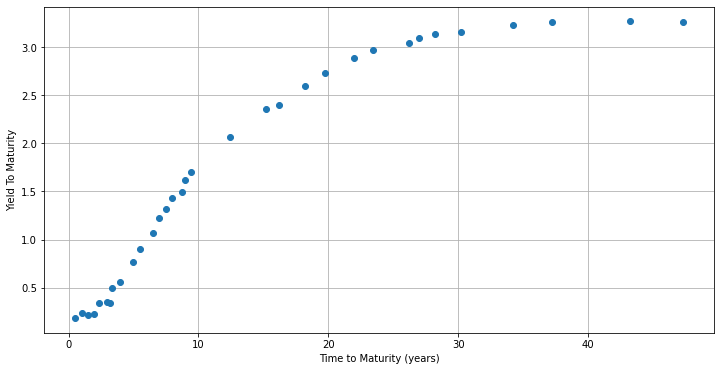

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(bondDf['yearsToMaturity'], bondDf['ytm'], 'o')
plt.grid(True)
plt.xlabel('Time to Maturity (years)')
plt.ylabel('Yield To Maturity')

In [101]:
def fitAndPlot(t,y,d):
    coeffs = np.polyfit(t, y, deg=d)
    ry = np.polyval(coeffs, t)
    plt.figure(figsize=(12, 8))
    plt.plot(t, y, 'o')
    plt.plot(t, ry, 'r', label='Fit')
    plt.legend(loc=0)
    plt.grid(True)
    plt.xlabel('Time to Maturity (years)')
    plt.ylabel('Yield to Maurity')

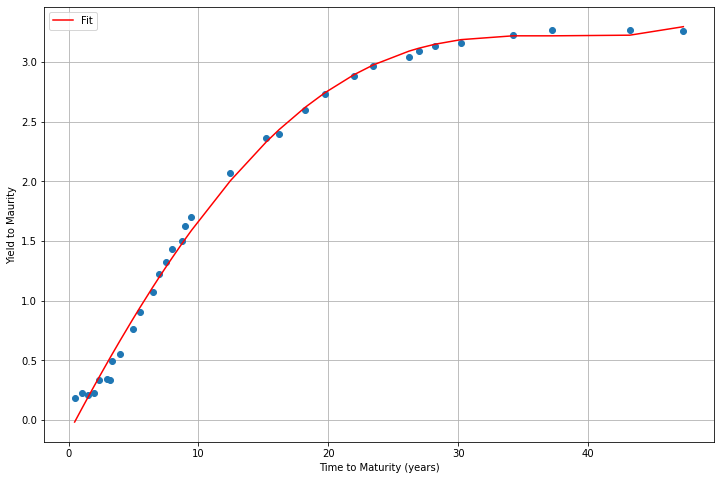

In [102]:
# This looks nice but does not seem to capture flattening at the short end
fitAndPlot(bondDf['yearsToMaturity'], bondDf['ytm'],4)

In [97]:
mask = bondDf['yearsToMaturity'] < 10.0 
bondDfShortMaturity = bondDf[mask]

In [98]:
bondDfShortMaturity

,epic,description,coupon,maturity,bid,ask,change,income yield,gross redemption yield,mid,ytm,yearsToMaturity,fullPrice
0,TR13,Uk Gilt Treasury Stk,4.50,07-Mar-13,101.92,102.07,-0.01,4.41,0.22,101.995,0.184433,0.462707,102.162819
1,T813,Uk Gilt Treasury Stk,8.00,27-Sep-13,107.86,107.98,-0.03,7.41,0.23,107.920,0.231006,1.021241,111.750074
2,TR14,Uk Gilt Treasury Stk,2.25,07-Mar-14,102.90,103.05,0.01,2.18,0.22,102.975,0.210937,1.462044,103.060400
3,T514,Uk Gilt Treasury Stk,5.00,07-Sep-14,109.28,109.43,0.02,4.57,0.23,109.355,0.227755,1.965820,109.525900
4,TR15,Uk Gilt Treasury Stk,2.75,22-Jan-15,105.57,105.68,0.05,2.60,0.33,105.625,0.335521,2.340914,106.062487
5,T4T,Uk Gilt Treasury Stk,4.75,07-Sep-15,112.92,113.04,0.04,4.20,0.35,112.980,0.346156,2.965157,113.145503
6,TY8,Uk Gilt Treasury Stk,8.00,07-Dec-15,124.39,124.55,0.04,6.43,0.34,124.470,0.338913,3.214307,126.755542
7,TS16,Uk Gilt Treasury Stk,2.00,22-Jan-16,104.92,105.04,0.07,1.91,0.49,104.980,0.494815,3.340251,105.299498
8,T16,Uk Gilt Treasury Stk,4.00,07-Sep-16,113.44,113.55,0.08,3.52,0.56,113.495,0.555964,3.967233,113.626069
9,TR17,Uk Gilt Treasury Stk,8.75,25-Aug-17,138.48,138.66,0.14,6.31,0.77,138.570,0.764514,4.930977,139.173949


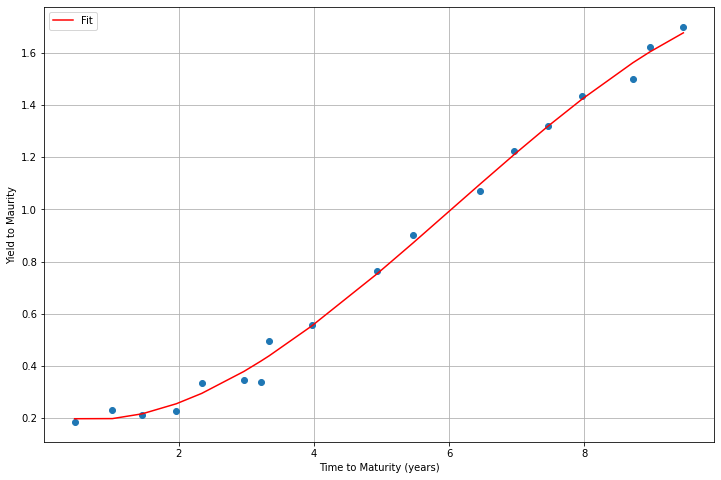

In [99]:
# With 3rd order we can fit just the short end but then we cannot do the long end too
fitAndPlot(bondDfShortMaturity['yearsToMaturity'], bondDfShortMaturity['ytm'],3)

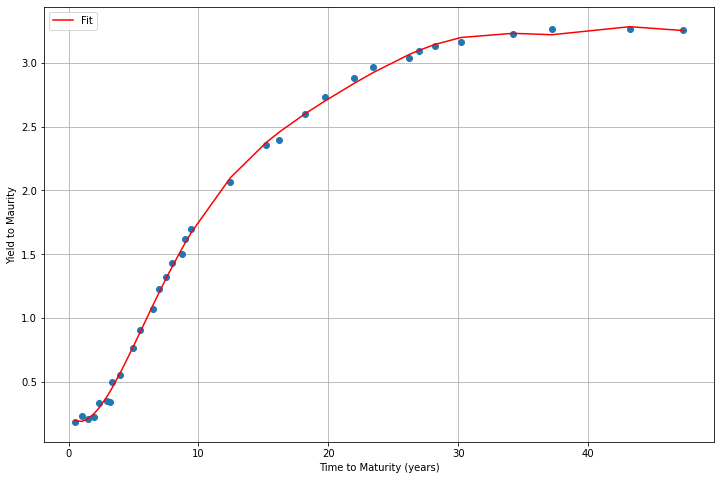

In [100]:
# This looks better but it does have seven coefficients !
fitAndPlot(bondDf['yearsToMaturity'], bondDf['ytm'],7)